# **Importy and read dataset**

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df=pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# **EDA (Exploratory Data Analysis) and preprocessing**

In [200]:
#  Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [201]:
# Check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [202]:
# Analyze numerical columns
numeric_col=['work_year','salary','salary_in_usd','remote_ratio']
df[numeric_col].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [203]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


## **1. experience_level**

In [204]:
# Explore categorical columns
df.experience_level.value_counts()


SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

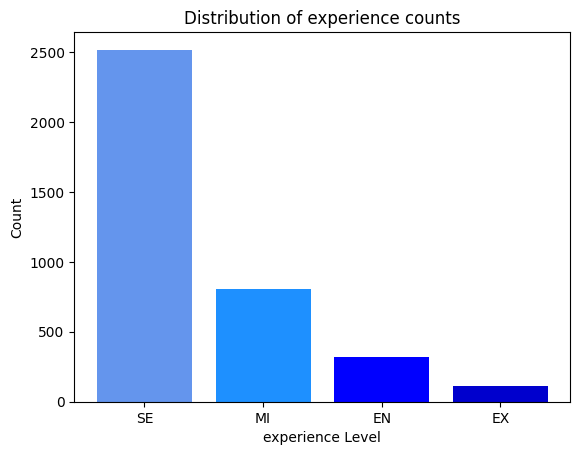

In [205]:
# Count the values in the "experience_level""
experience_counts = df['experience_level'].value_counts()

# Create a bar plot
plt.bar(experience_counts.index, experience_counts.values ,color=['#6495ED','#1E90FF','#0000FF','#0000CD'])


# Set labels and title
plt.xlabel('experience Level')
plt.ylabel('Count')
plt.title('Distribution of experience counts')
# Display the plot
plt.show()

1. "SE" (Software Engineer): This value appears 2516 times in the dataset indicating that it is the most common experience level in the dataset.

2. "MI" (Mid-level): This value appears 805 times in the dataset, indicating that it is the second most common experience level.

3. "EN" (Entry-level): This value appears 320 times in the dataset, indicating that it is the third most common experience level.

4. "EX" (Executive): This value appears 114 times in the dataset, indicating that it is the least common experience level.

# **2. employment_type**

In [206]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

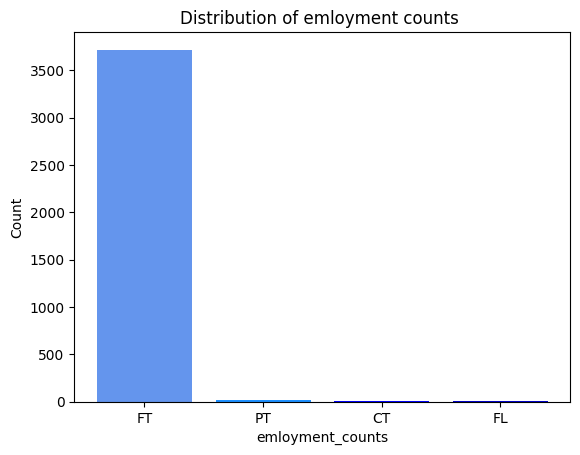

In [207]:
# Count the values in the "experience_level""
emloyment_counts = df['employment_type'].value_counts()

# Create a bar plot
plt.bar(emloyment_counts.index, emloyment_counts.values,color=['#6495ED','#1E90FF','#0000FF','#0000CD'])


# Set labels and title
plt.xlabel('emloyment_counts')
plt.ylabel('Count')
plt.title('Distribution of emloyment counts ')

# Display the plot
plt.show()

1. "FT" (Full-Time): This value appears 3718 times in the dataset, indicating that it is the most common employment type in the dataset.

2. "PT" (Part-Time): This value appears 17 times in the dataset, indicating that it is the second most common employment type.

3. "CT" (Contract): This value appears 10 times in the dataset, indicating that it is the third most common employment type.

4. "FL" (Freelance): This value appears 10 times in the dataset, indicating that it is the least common employment type.

## **3. job_title**

In [208]:
df['job_title'].value_counts()


Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

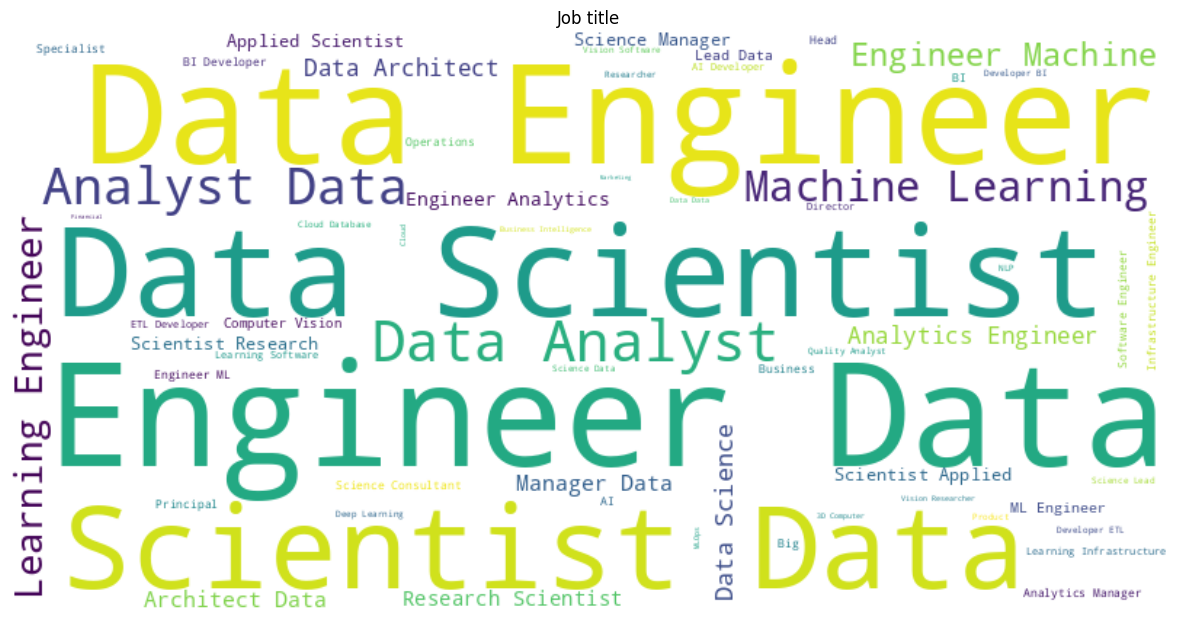

In [209]:
from wordcloud import WordCloud

#  word cloud for an job_title
plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job title ')
plt.show()

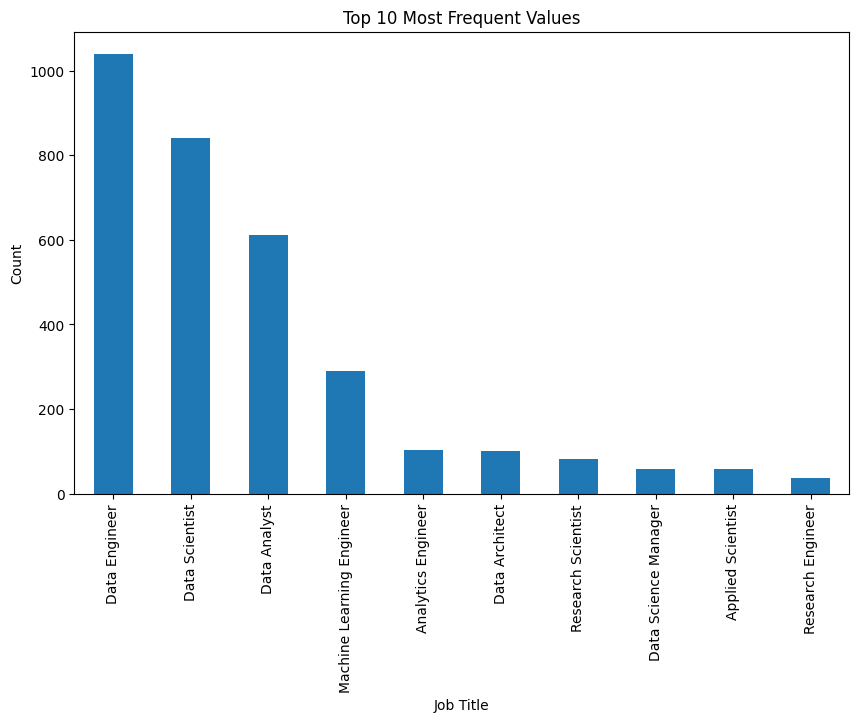

In [210]:
# Example top 10 bar plot for Job Title
top_n=10
plt.figure(figsize=(10, 6))
df['job_title'].value_counts()[:top_n].plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title(f'Top {top_n} Most Frequent Values')
plt.show()

1. "Data Engineer": This job title appears 1040 times in the dataset, indicating that it is the most common job title.

2. "Data Scientist": This job title appears 840 times in the dataset, indicating that it is the second most common job title.

3. "Data Analyst": This job title appears 612 times in the dataset, indicating that it is the third most common job title.

4. "Machine Learning Engineer": This job title appears 289 times in the dataset.

5. "Analytics Engineer": This job title appears 103 times in the dataset.


# **4.salary_currency**

In [211]:
salary_currency_counts=df['salary_currency'].value_counts()
salary_currency_counts

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [212]:
df['salary_currency'].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

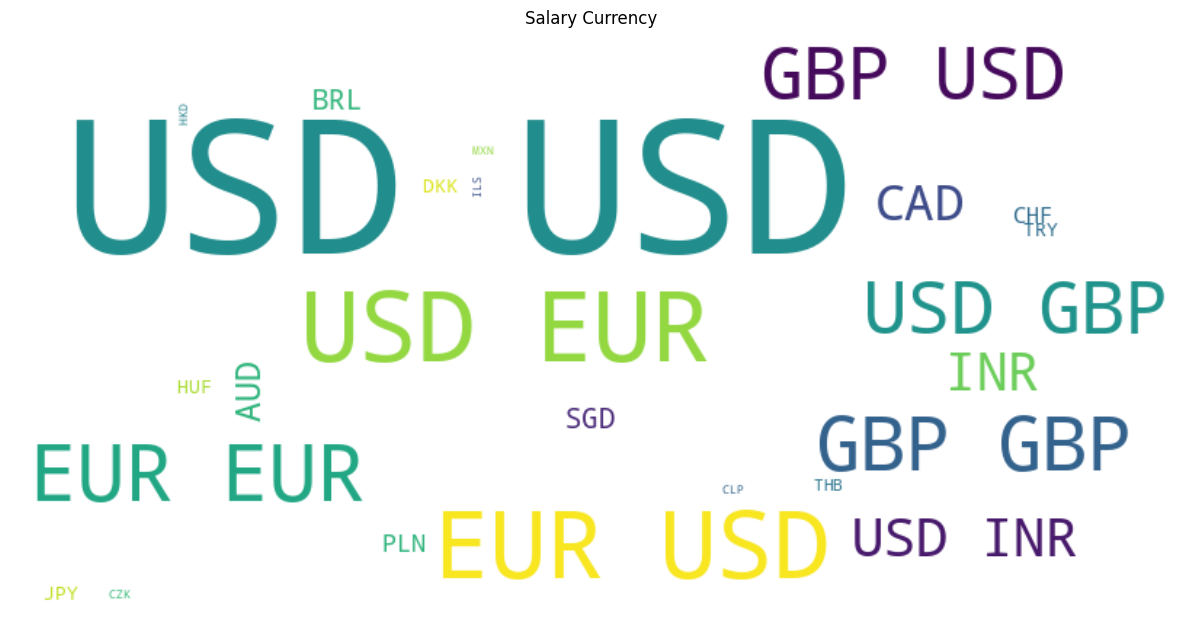

In [213]:
#  word cloud for an job_title
plt.figure(figsize=(15,8))
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(df['salary_currency']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Salary Currency')
plt.show()


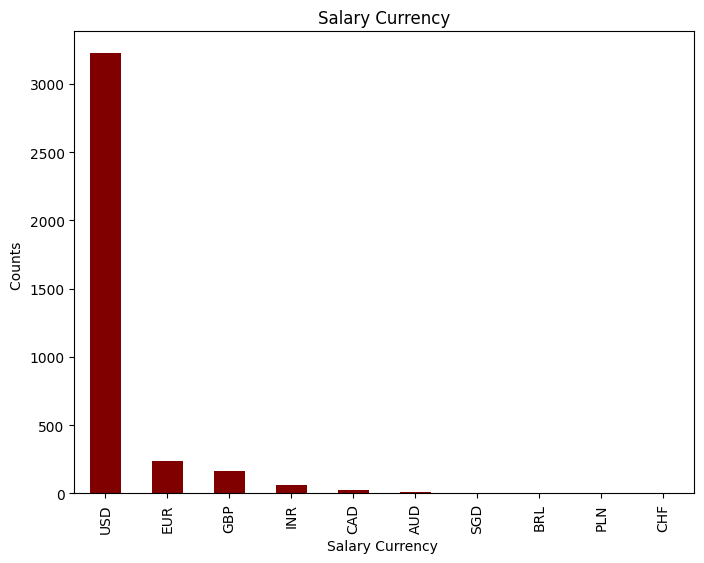

In [214]:
top_n=10
value_countss=df['salary_currency'].value_counts()[:top_n]

plt.figure(figsize=(8,6))
value_countss.plot(kind='bar',color ='maroon')
# set labels and tittle

plt.xlabel('Salary Currency ')
plt.ylabel('Counts ')
plt.title('Salary Currency')

plt.show()


1. "USD" (United States Dollar): This value appears 3224 times in the dataset, indicating that it is the most common currency for salary payments.

2. "EUR" (Euro): This value appears 236 times in the dataset, indicating that it is the second most common currency.

3. "GBP" (British Pound): This value appears 161 times in the dataset, indicating that it is the third most common currency.

4. "INR" (Indian Rupee): This value appears 60 times in the dataset.

5. "CAD" (Canadian Dollar): This value appears 25 times in the dataset.



# **employee_residence**

In [215]:
vlue_counts_residence=df['employee_residence'].value_counts()
vlue_counts_residence
# vlue_counts_residence length = 78

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [216]:
unique_residence=df['employee_residence'].unique()
unique_residence

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

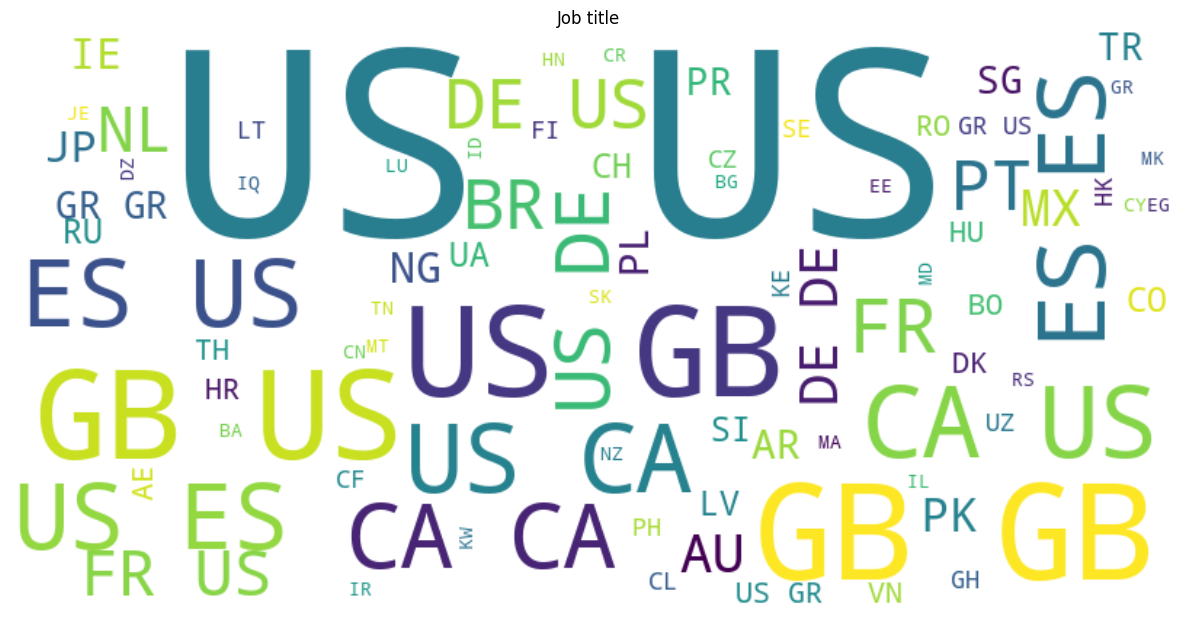

In [217]:
#  word cloud for an employee_resedience
plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['employee_residence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job title ')
plt.show()

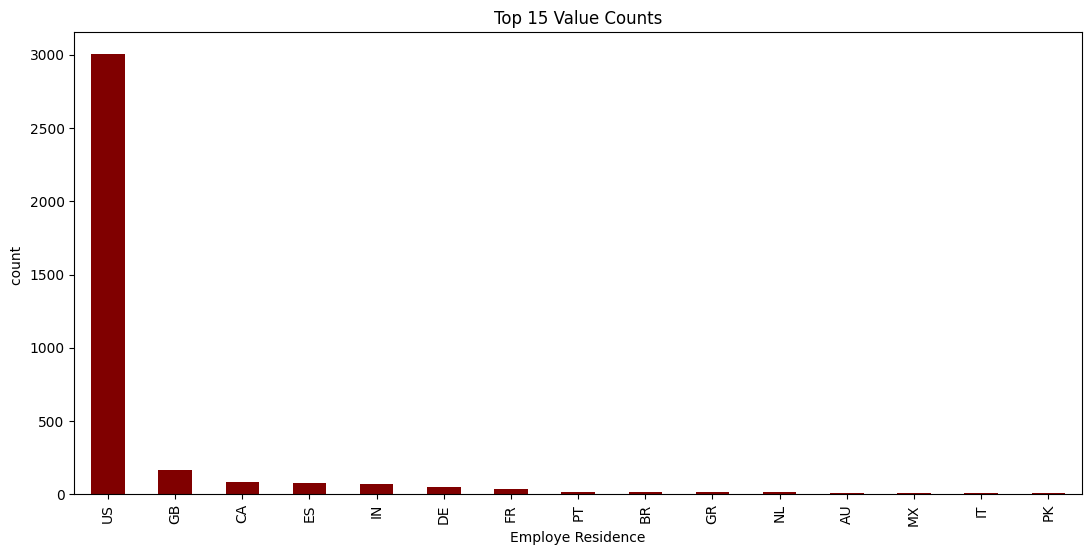

In [218]:
# will visualize the top 10

top_n=15
vlue_counts=df['employee_residence'].value_counts()[:top_n]
plt.figure(figsize=(13,6))
vlue_counts.plot(kind='bar',color ='maroon')

# set labels and title
plt.xlabel('Employe Residence')
plt.ylabel('count ')
plt.title(f'Top {top_n} Value Counts')

plt.show()


1. "US" (United States): This value appears 3004 times in the dataset, indicating that it is the most common employee residence.

2. "GB" (United Kingdom): This value appears 167 times in the dataset, indicating that it is the second most common employee residence.

3. "CA" (Canada): This value appears 85 times in the dataset, indicating that it is the third most common employee residence.

4. "ES" (Spain): This value appears 80 times in the dataset.

5. "IN" (India): This value appears 71 times in the dataset.


# **company_location**

In [219]:
comb_loc=df['company_location'].value_counts()
comb_loc

# the length =72

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

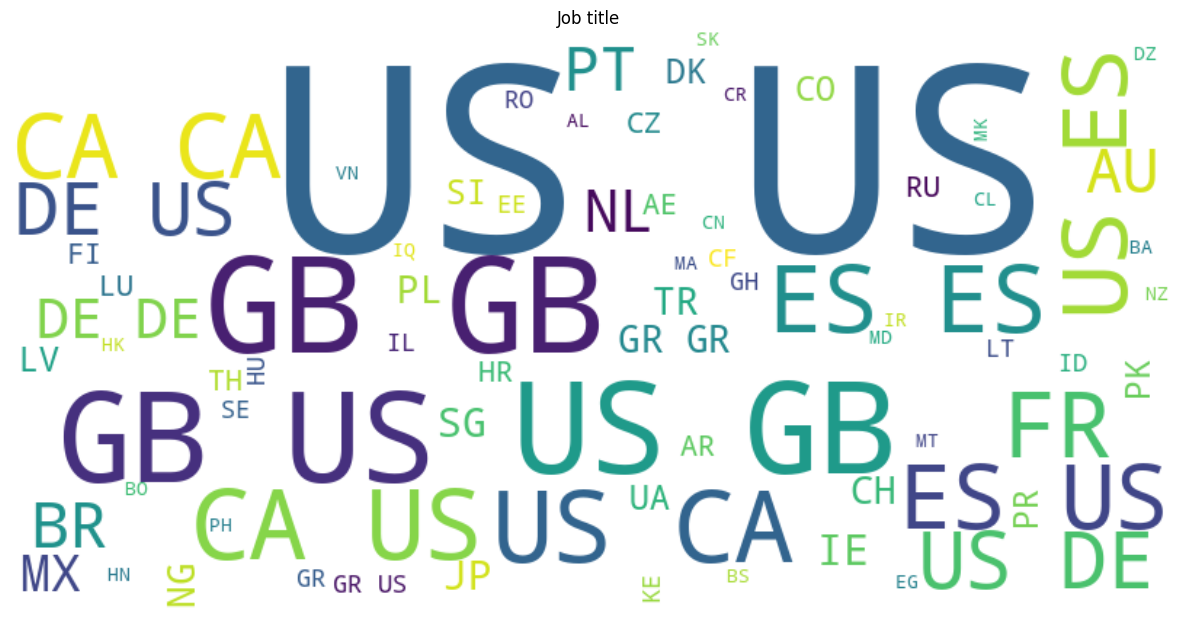

In [220]:
#  word cloud for an job_title
plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['company_location']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job title ')
plt.show()

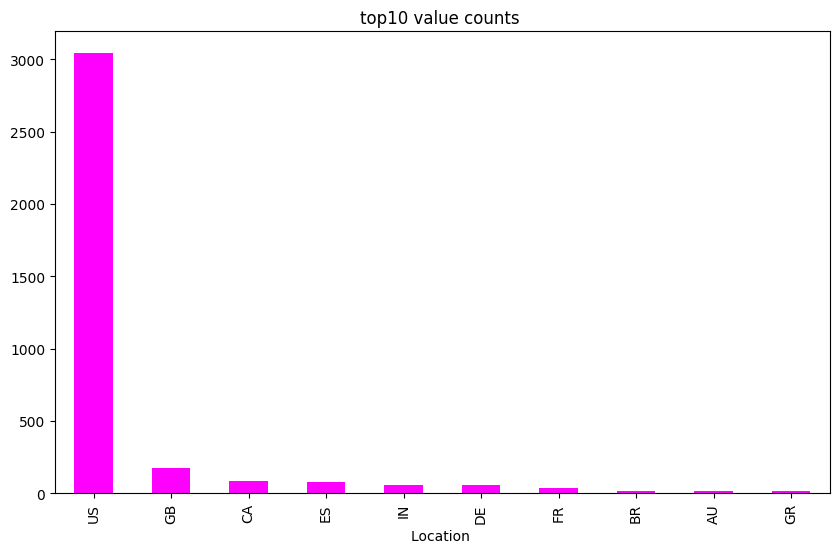

In [221]:
top_n=10

com_loc_count=df['company_location'].value_counts()[:top_n]
# create the plot for the comapny location
plt.figure(figsize=(10,6))
com_loc_count.plot(kind='bar',color='magenta')

# set title and laels

plt.xlabel('Location ')

plt.title(f'top{top_n} value counts ')
plt.show()

1. "US" (United States): This value appears 3040 times in the dataset, indicating that it is the most common company location.

2. "GB" (United Kingdom): This value appears 172 times in the dataset, indicating that it is the second most common company location.

3. "CA" (Canada): This value appears 87 times in the dataset, indicating that it is the third most common company location.

4. "ES" (Spain): This value appears 77 times in the dataset.

5. "IN" (India): This value appears 58 times in the dataset.


# **company_size**

In [222]:
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

<Axes: >

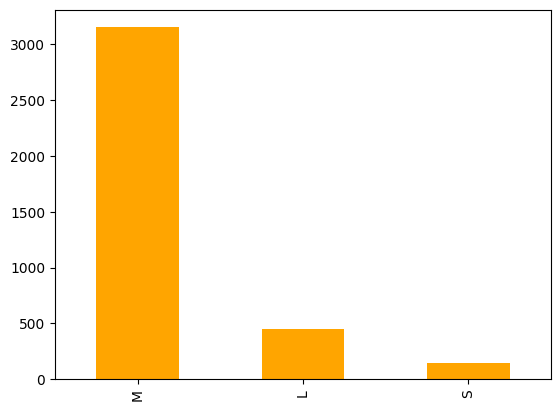

In [223]:
df.company_size.value_counts().plot(kind='bar',color='orange')

1. "M" (Medium): This value appears 3153 times in the dataset, indicating that it is the most common company size.

2. "L" (Large): This value appears 454 times in the dataset, indicating that it is the second most common company size.

3. "S" (Small): This value appears 148 times in the dataset, indicating that it is the third most common company size.

<ipython-input-224-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

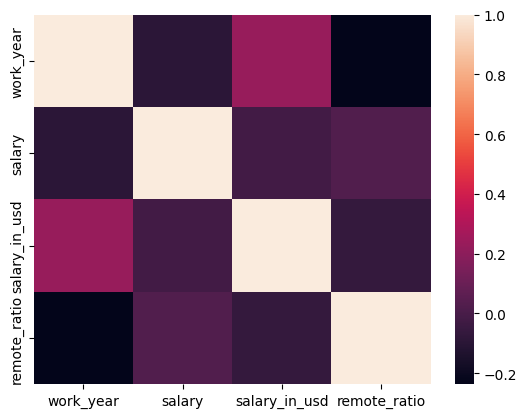

In [224]:
sns.heatmap(df.corr())

## **3. Preprocessing and hot encoded**

In [225]:
# copy the data frame

df1=df.copy()
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [226]:
#  handle the categorical data first

df1['company_location'].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [227]:
df1['company_location']=np.where(df1['company_location']=='US', 1,0)
df1.rename(columns={'company_location' : 'company_location_US' },inplace=True)
# check
df1['company_location_US'].value_counts()

1    3040
0     715
Name: company_location_US, dtype: int64

In [228]:
# job_title
df1['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [229]:
def top_5_job_title(job_title):
  if job_title in ['Data Engineer','Data Scientist','Data Analyst','Machine Learning Engineer','ML Engineer','Analytics Engineer']:
    return job_title
  else :
    return "Others"

df1['New_job_title']=df1['job_title'].apply(top_5_job_title)

In [230]:
df1['New_job_title'] = df1['New_job_title'].replace(['Machine Learning Engineer', 'ML Engineer'], 'ML Engineer')


In [231]:
df1['New_job_title'].value_counts()

Data Engineer         1040
Data Scientist         840
Others                 837
Data Analyst           612
ML Engineer            323
Analytics Engineer     103
Name: New_job_title, dtype: int64

In [232]:
# Employee Residence
df1['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [233]:
df1['employee_residence']=np.where(df1['employee_residence']=='US', 1,0)
df1.rename(columns={'employee_residence' : 'employee_residence_US' },inplace=True)
# check
df1['employee_residence_US'].value_counts()

1    3004
0     751
Name: employee_residence_US, dtype: int64

## **One Hot Encoded**

In [234]:
df1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,company_size,New_job_title
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,0,100,0,L,Others
1,2023,MI,CT,ML Engineer,30000,USD,30000,1,100,1,S,ML Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,1,100,1,S,ML Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,0,100,0,M,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,0,100,0,M,Data Scientist


In [235]:
df2 = df1.drop(['job_title', 'salary_currency','salary'], axis=1)


In [236]:
df2.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,company_size,New_job_title
0,2023,SE,FT,85847,0,100,0,L,Others
1,2023,MI,CT,30000,1,100,1,S,ML Engineer
2,2023,MI,CT,25500,1,100,1,S,ML Engineer
3,2023,SE,FT,175000,0,100,0,M,Data Scientist
4,2023,SE,FT,120000,0,100,0,M,Data Scientist


In [237]:
# encode
columns_to_encode = ['experience_level', 'employment_type', 'company_size', 'New_job_title']
# Apply dummy encoding
df3 = pd.get_dummies(df2, columns=columns_to_encode)
# Print the encoded dataframe
df3.head()

,work_year,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,employment_type_PT,company_size_L,company_size_M,company_size_S,New_job_title_Analytics Engineer,New_job_title_Data Analyst,New_job_title_Data Engineer,New_job_title_Data Scientist,New_job_title_ML Engineer,New_job_title_Others
0,2023,85847,0,100,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2023,30000,1,100,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,2023,25500,1,100,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,2023,175000,0,100,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,2023,120000,0,100,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [238]:
# combiend dataset
features = ["work_year",  "employee_residence_US", "remote_ratio","company_location_US"]
df4 = pd.concat([df_copy[features], df3], axis=1)


In [239]:
df4.head(3)

,work_year,employee_residence_US,remote_ratio,company_location_US,work_year,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,experience_level_EN,...,employment_type_PT,company_size_L,company_size_M,company_size_S,New_job_title_Analytics Engineer,New_job_title_Data Analyst,New_job_title_Data Engineer,New_job_title_Data Scientist,New_job_title_ML Engineer,New_job_title_Others
0,2023,0,100,0,2023,85847,0,100,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2023,1,100,1,2023,30000,1,100,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2023,1,100,1,2023,25500,1,100,1,0,...,0,0,0,1,0,0,0,0,1,0


# **4. Buliding model**

In [240]:
# Importing libraries for machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [241]:
# spliting the dataset into feature and target
X = df4.drop('salary_in_usd', axis=1)
y = df4['salary_in_usd']


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4.1 Decision Tree Regression**

In [243]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None,2,5,6,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the Decision Tree regressor
tree = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target variable for the test data using the best model
y_pred_dt = best_tree.predict(X_test)

print("Best Decision Tree Hyperparameters:", best_params)

Best Decision Tree Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [244]:
# Create the DecisionTreeRegressor model
DT_model = DecisionTreeRegressor(max_depth=6,min_samples_leaf=4,min_samples_split=10)

# Fit the model to the training data
DT_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt =DT_model.predict(X_test)



In [245]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
mae = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2_dt)

Mean Squared Error (MSE): 2499597453.836797
Root Mean Squared Error (RMSE): 49995.97437631151
Mean Absolute Error (MAE): 38397.674409080166
R-squared (R²): 0.3668362405219646


# **4.2 SVM**

In [246]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1,1,10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Instantiate the SVR model
svm = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target variable for the test data using the best model
y_pred_svm = best_svm.predict(X_test)

# Evaluate the performance of the best model
mse = mean_squared_error(y_test, y_pred_svm)
print("Best SVR MSE:", mse)
print("Best SVR Hyperparameters:", best_params)


Best SVR MSE: 3404957349.6927366
Best SVR Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


In [247]:
# Create and train the SVR model
SVR_model = SVR(kernel='linear', C=10, epsilon=0.01)
SVR_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = SVR_model.predict(X_test)

In [248]:
# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse = mean_squared_error(y_test, y_pred_svm, squared=False)
mae = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_svm)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 3404957349.6927366
Root Mean Squared Error (RMSE): 58352.01238768666
Mean Absolute Error (MAE): 44702.721598478274
R-squared (R²): 0.3698126772121767


## **4.3 Linear Regression**

In [249]:
from sklearn.linear_model import LinearRegression
# Instantiate the linear regression model
LR_model = LinearRegression()

# Fit the model to the training data
LR_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_lr = LR_model.predict(X_test)

In [250]:
# Evaluate the model
LR_mse = mean_squared_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
mae = mean_absolute_error(y_test, y_pred_lr)
LR_r2 = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", LR_mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", LR_r2)

Mean Squared Error (MSE): 2452133224.68088
Root Mean Squared Error (RMSE): 49519.01881783281
Mean Absolute Error (MAE): 38411.35384591378
R-squared (R²): 0.37885922835424835


# **4.4 Random Forest**

In [251]:
from sklearn.ensemble import RandomForestRegressor
# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Define the parameter grid for greedy search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [252]:
# Create and train the Random Forest Regression model
RF_model = RandomForestRegressor(n_estimators=100,max_depth=10 ,min_samples_split=2 ,min_samples_leaf=4 ,random_state=0)
RF_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = RF_model.predict(X_test)


In [253]:
# Evaluate the model
RF_mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
mae = mean_absolute_error(y_test, y_pred_rf)
RF_r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", RF_mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", RF_r2)

Mean Squared Error (MSE): 2417566266.97933
Root Mean Squared Error (RMSE): 49168.75295326627
Mean Absolute Error (MAE): 37706.47024668893
R-squared (R²): 0.38761525619322557


# **4.5 Gradient Boosting Regressor**

In [255]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [10,50,100],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Perform the grid search
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_GBR = best_model.predict(X_test)

# Evaluate the model
print('Best Mean Squared Error:', mse)
print('Best Parameters:', best_params)


Best Mean Squared Error: 3404957349.6927366
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [256]:
# Create and train the Gradient Boosting Regression model
GBR_model= GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=10)
GBR_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GBR =GBR_model.predict(X_test)

# Evaluate the model
GBR_mse = mean_squared_error(y_test, y_pred_GBR)
rmse = mean_squared_error(y_test, y_pred_GBR, squared=False)
mae = mean_absolute_error(y_test, y_pred_GBR)
GBR_r2 = r2_score(y_test, y_pred_GBR)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", GBR_mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", GBR_r2)

Mean Squared Error (MSE): 2487847107.325345
Root Mean Squared Error (RMSE): 49878.32302037976
Mean Absolute Error (MAE): 38837.17784520621
R-squared (R²): 0.3698126772121767


## **4.6 Polynomial Regression**

In [257]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


# Create the RandomForestRegressor model
PR_model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
PR_model.fit(X, y)

# Make predictions
y_pred =PR_model.predict(X)

# Evaluate the model
PR_mse = mean_squared_error(y_test, y_pred_GBR)
rmse = mean_squared_error(y_test, y_pred_GBR, squared=False)
mae = mean_absolute_error(y_test, y_pred_GBR)
PR_r2 = r2_score(y_test, y_pred_GBR)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", PR_mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", PR_r2)

Mean Squared Error (MSE): 2487847107.325345
Root Mean Squared Error (RMSE): 49878.32302037976
Mean Absolute Error (MAE): 38837.17784520621
R-squared (R²): 0.3698126772121767


# **Champion model**

In [258]:
# Create an empty DataFrame
model_results = pd.DataFrame(columns=['Model', 'MSE', 'R2 Score'])

# Add model results to the DataFrame
model_results = model_results.append({'Model': 'Decision Tree', 'MSE': mse_dt, 'R2 Score': r2_dt}, ignore_index=True)
model_results = model_results.append({'Model': 'Support Vector Machine', 'MSE': mse_svm, 'R2 Score': r2_svm}, ignore_index=True)
model_results = model_results.append({'Model': 'Linear Regression', 'MSE':LR_mse, 'R2 Score': LR_r2}, ignore_index=True)
model_results = model_results.append({'Model': 'Random Foresst Regression', 'MSE':RF_mse, 'R2 Score': RF_r2}, ignore_index=True)
model_results = model_results.append({'Model': 'Gradient Boosting Regressor', 'MSE':GBR_mse, 'R2 Score': GBR_r2}, ignore_index=True)
model_results = model_results.append({'Model': 'Polynomial Regression', 'MSE':PR_mse, 'R2 Score': PR_r2}, ignore_index=True)


<ipython-input-258-e54ad7f8282d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Decision Tree', 'MSE': mse_dt, 'R2 Score': r2_dt}, ignore_index=True)
<ipython-input-258-e54ad7f8282d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Support Vector Machine', 'MSE': mse_svm, 'R2 Score': r2_svm}, ignore_index=True)
<ipython-input-258-e54ad7f8282d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Linear Regression', 'MSE':LR_mse, 'R2 Score': LR_r2}, ignore_index=True)
<ipython-input-258-e54ad7f8282d>:8: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [266]:
model_results_sorted = model_results.sort_values(by='R2 Score', ascending=False)

# Display the sorted DataFrame
model_results_sorted.head(6)


,Model,MSE,R2 Score
3,Random Foresst Regression,2.417566e+09,0.387615
2,Linear Regression,2.452133e+09,0.378859
4,Gradient Boosting Regressor,2.487847e+09,0.369813
5,Polynomial Regression,2.487847e+09,0.369813
0,Decision Tree,2.499597e+09,0.366836
1,Support Vector Machine,3.404957e+09,0.137503
